In [8]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from olist.order import Order
order = Order().get_training_data(with_distance_seller_customer=True)
from olist.seller import Seller
sellers = Seller().get_training_data()
reviews=Seller().get_review_score()

In [36]:
from olist.data import Olist
data = Olist().get_data()

In [46]:
# Orders dataset
orders = data['orders'].copy()
# Handle datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp').sort_index()

Text(0.5, 1.0, 'weekly orders (total)')

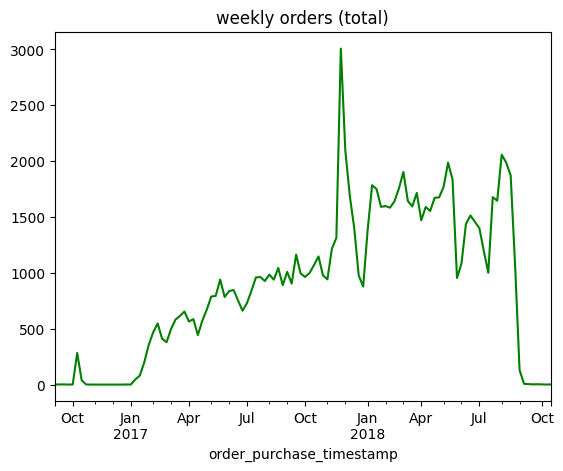

In [47]:
orders.resample('W')['order_id'].count().plot(color='g')
plt.title('weekly orders (total)')

Text(0.5, 1.0, 'weekly non-delivered orders')

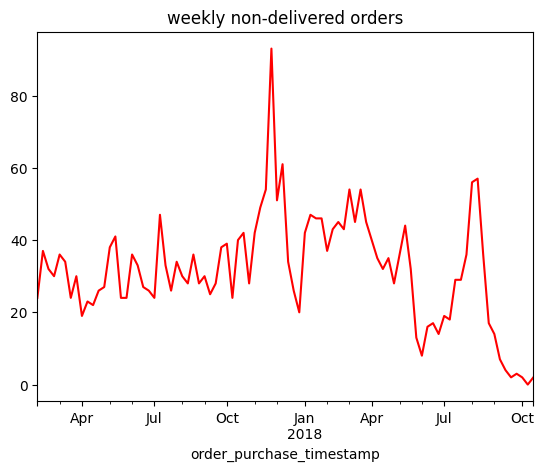

In [48]:
orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
plt.title('weekly non-delivered orders')

In [41]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)
order_ids_payments.head()

/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_48548/3560353378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]


,order_payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [42]:
orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

In [43]:
# handle datetime
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']: 
    orders_payments[col] = pd.to_datetime(orders_payments[col])
orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62


/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_48548/1357076552.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_48548/1357076552.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_orders_payments.mean()['order_payment_value'].plot(label = 'Mean payments (R)')


Text(0.5, 1.0, 'Weekly orders values')

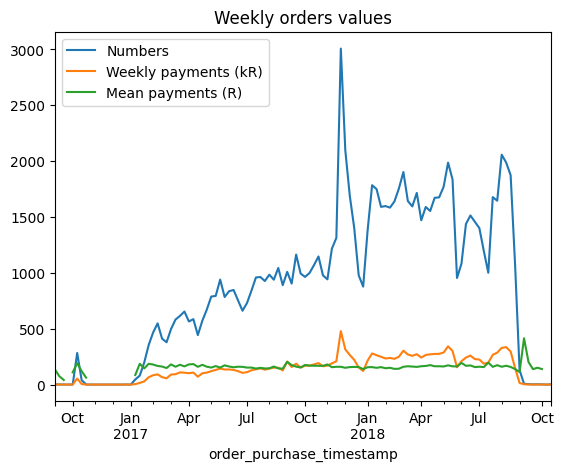

In [44]:
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').resample('W')
weekly_orders_payments.count()['order_id'].plot(label='Numbers')
weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
weekly_orders_payments.mean()['order_payment_value'].plot(label = 'Mean payments (R)')
plt.legend()
plt.title('Weekly orders values')

/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_48548/3221748769.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax1.plot(weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000),
/var/folders/wf/wz1_qkfj6p9g2bq93bwdtvlw0000gn/T/ipykernel_48548/3221748769.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax1.plot(weekly_orders_payments.mean()['order_payment_value'],


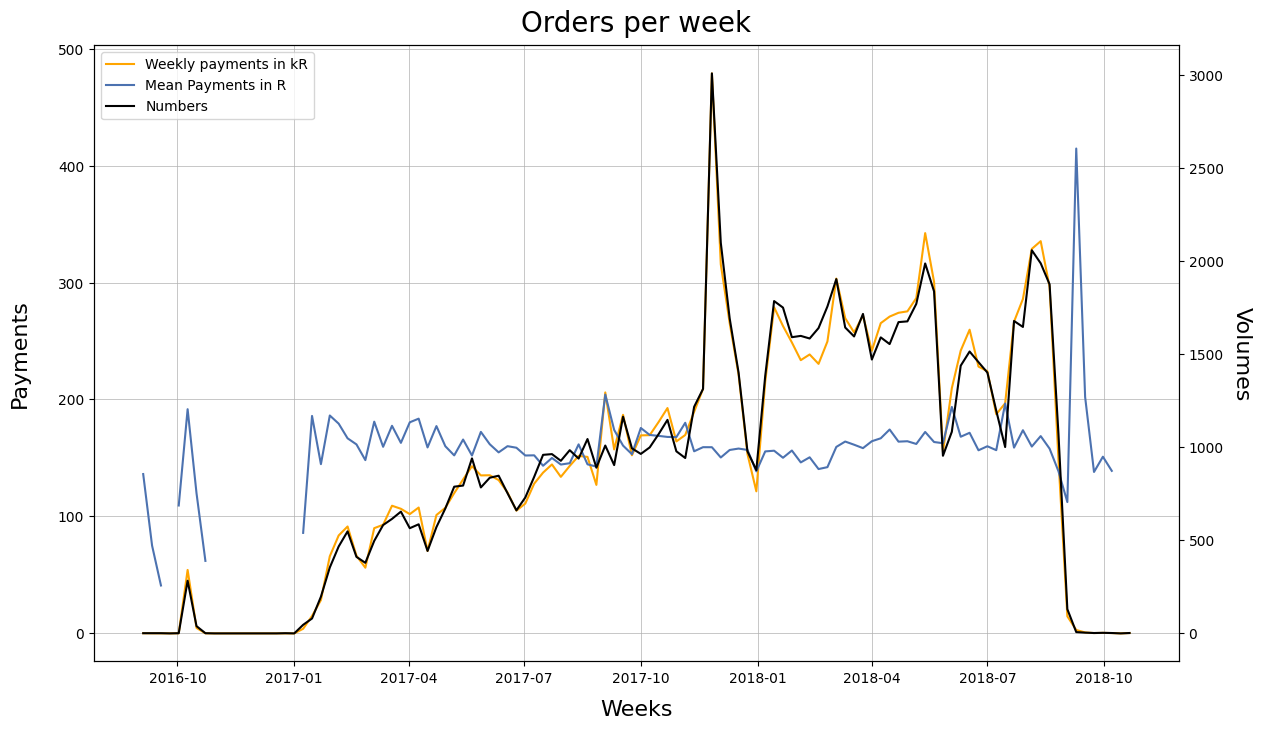

In [45]:
# Plot numbers of weekly orders purchase

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments
    
    ax1.plot(weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000),
             color="orange",
             label="Weekly payments in kR")
    ax1.plot(weekly_orders_payments.mean()['order_payment_value'],
             label="Mean Payments in R")
    ax1.set_xlabel("Weeks", 
                   fontsize = 16, 
                   labelpad = 10)
    ax1.set_ylabel("Payments", 
                   fontsize = 16, 
                   labelpad = 20)

    # Numbers
    ax2.plot(weekly_orders_payments.count()['order_id'],
             label="Numbers",
             c="black")
    ax2.set_ylabel("Volumes", 
                   fontsize = 16, 
                   rotation = 90*3, 
                   labelpad = 20)

    # Get a common legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Title
    ax1.set_title('Orders per week', 
                  fontsize = 20, 
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)
    plt.show()